   Height (inches)  Weight(pounds)  Age  Grip strength  Frailty        BMI
0             65.8             112   30             30        0  18.185346
1             71.5             136   19             31        0  18.701746
2             69.4             153   45             29        0  22.332010
3             68.2             142   22             28        1  21.462234
4             67.8             144   29             24        1  22.022085
       Height (inches)  Weight(pounds)        Age  Grip strength    Frailty  \
count        10.000000       10.000000  10.000000      10.000000  10.000000   
mean         68.600000      131.900000  32.500000      26.000000   0.400000   
std           1.670662       14.231811  12.860361       4.521553   0.516398   
min          65.800000      112.000000  17.000000      19.000000   0.000000   
25%          67.825000      120.750000  22.250000      22.500000   0.000000   
50%          68.450000      136.000000  29.500000      27.000000   0.000000 

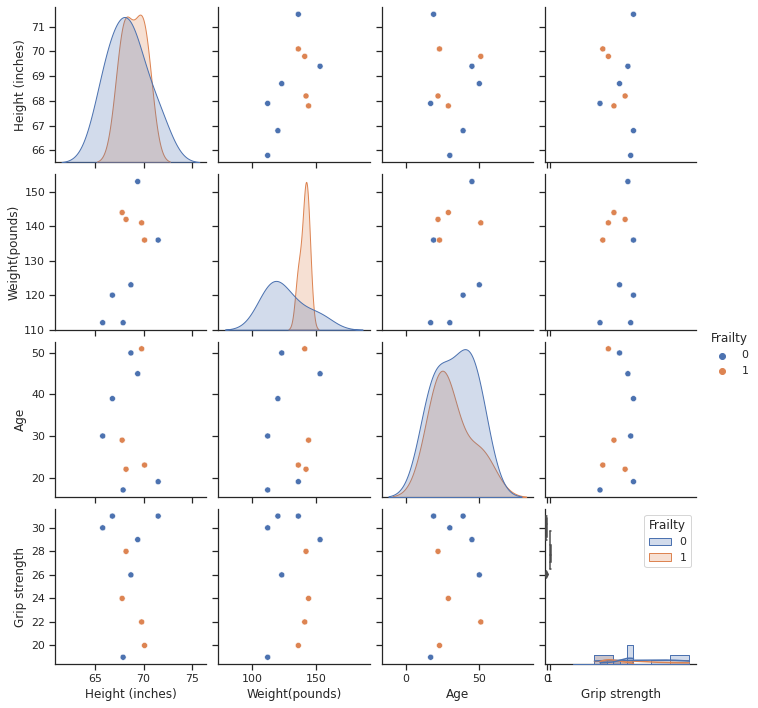

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data from a CSV file into a pandas dataframe
data1 = pd.read_csv("PDSass1.csv")

#Remove any rows with missing values using the dropna() method
data1 = data1.dropna()

# Convert the "Frailty" column to binary values (0 or 1) using the apply() method and lambda function
data1["Frailty"] = data1["Frailty"].apply(lambda x: 1 if x == "Y" else 0)

# Print the first few rows of the preprocessed data to check if it has been properly preprocessed
print(data1.head())

# Save the preprocessed data to a new CSV file named "clean_frality_data.csv"

data1.to_csv("clean_frality_data.csv", index=False)

# Load the preprocessed data from the CSV file "clean_frality_data.csv"
data2 = pd.read_csv("clean_frality_data.csv")

# Check the summary statistics of the data
print(data2.describe())

# Create a scatterplot matrix of the numeric variables using the pairplot() function from seaborn.
sns.set_theme(style="ticks")
sns.pairplot(data2, vars=["Height (inches)", "Weight(pounds)", "Age", "Grip strength"], hue="Frailty")

# Create a histogram of the "Age" variable using the histplot() function from seaborn.
sns.histplot(data2, x="Age", hue="Frailty", element="step", kde=True)

# Create a boxplot of the Grip.strength variable
sns.boxplot(data=data1, x="Frailty", y="Grip strength", hue="Frailty")

# Create a density plot of the Grip.strength variable
sns.histplot(data2, x="Grip strength", hue="Frailty", element="step", kde=True)

# Perform a t-test to compare the Grip.strength between the Frailty groups
ttest_results = stats.ttest_ind(data1[data1.Frailty == 0]["Grip strength"], 
                                data1[data1.Frailty == 1]["Grip strength"])
print(ttest_results)

# Save the test results to a text file named "test_results.txt" using the open() method and the write() method
with open("test_results", "w") as f:
    f.write(str(ttest_results))

<AxesSubplot:xlabel='Grip strength', ylabel='Count'>

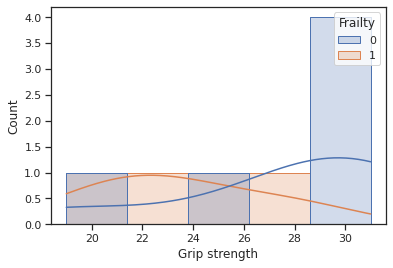

In [12]:
sns.histplot(data2, x="Grip strength", hue="Frailty", element="step", kde=True)
